In [68]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

directories = ["../object-dataset/","../object-detection-crowdai/"]

labels = ['Frame','xmin','ymin','xmax','ymax','FilePath','Label']
df1 = pd.read_csv(directories[0] + os.path.sep + "labels.csv",header=0,delimiter=" ")
df1["FilePath"] = directories[0] + df1["Frame"]
df1 = df1[labels]
df_vehicles1 = df1[(df1['Label']=='car') | (df1['Label']=='truck')].reset_index()
df_vehicles1.head()


,index,Frame,xmin,ymin,xmax,ymax,FilePath,Label
0,0,1478019952686311006.jpg,950,574,1004,620,../object-dataset/1478019952686311006.jpg,car
1,2,1478019953180167674.jpg,872,586,926,632,../object-dataset/1478019953180167674.jpg,car
2,3,1478019953689774621.jpg,686,566,728,618,../object-dataset/1478019953689774621.jpg,truck
3,4,1478019953689774621.jpg,716,578,764,622,../object-dataset/1478019953689774621.jpg,car
4,5,1478019953689774621.jpg,826,580,880,626,../object-dataset/1478019953689774621.jpg,car


In [15]:
df2 = pd.read_csv(directories[1] + os.path.sep + "labels.csv")
df2["FilePath"] = directories[1] +df2 ["Frame"]
df2 = df2[labels]
df_vehicles2 = df2[(df2['Label']=='Car') | (df2['Label']=='Truck')].reset_index()
df_vehicles2.head()



,index,Frame,xmin,ymin,xmax,ymax,FilePath,Label
0,0,1479498371963069978.jpg,785,533,905,644,../object-detection-crowdai/147949837196306997...,Car
1,1,1479498371963069978.jpg,89,551,291,680,../object-detection-crowdai/147949837196306997...,Car
2,2,1479498371963069978.jpg,268,546,383,650,../object-detection-crowdai/147949837196306997...,Car
3,3,1479498371963069978.jpg,455,522,548,615,../object-detection-crowdai/147949837196306997...,Truck
4,4,1479498371963069978.jpg,548,522,625,605,../object-detection-crowdai/147949837196306997...,Truck


(130680, 9)


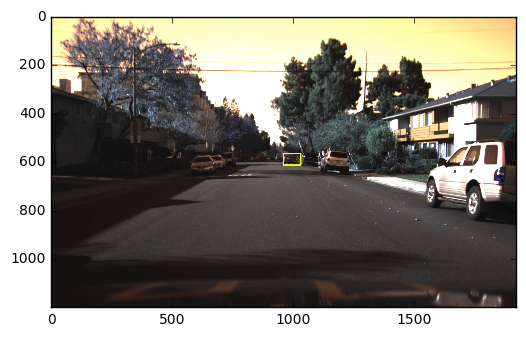

,level_0,index,Frame,xmin,ymin,xmax,ymax,FilePath,Label
0,0,0,1478019952686311006.jpg,950,574,1004,620,../object-dataset/1478019952686311006.jpg,car
1,1,2,1478019953180167674.jpg,872,586,926,632,../object-dataset/1478019953180167674.jpg,car
2,2,3,1478019953689774621.jpg,686,566,728,618,../object-dataset/1478019953689774621.jpg,truck
3,3,4,1478019953689774621.jpg,716,578,764,622,../object-dataset/1478019953689774621.jpg,car
4,4,5,1478019953689774621.jpg,826,580,880,626,../object-dataset/1478019953689774621.jpg,car


In [46]:
df_vehicles = pd.concat([df_vehicles1,df_vehicles2]).reset_index()

print(df_vehicles.shape)


index = 130670
img = cv2.imread(df_vehicles["FilePath"][index])
xmin = df_vehicles["xmin"][index]
ymin = df_vehicles["ymin"][index]
xmax = df_vehicles["xmax"][index]
ymax = df_vehicles["ymax"][index]

cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,255,0),3)
plt.imshow(img)
plt.show()
df_vehicles.head()

In [47]:
df_vehicles.tail()

,level_0,index,Frame,xmin,ymin,xmax,ymax,FilePath,Label
130675,66384,72059,1479506176491553178.jpg,958,559,1045,621,../object-detection-crowdai/147950617649155317...,Car
130676,66385,72060,1479506176491553178.jpg,1038,558,1122,630,../object-detection-crowdai/147950617649155317...,Car
130677,66386,72061,1479506176491553178.jpg,667,558,747,626,../object-detection-crowdai/147950617649155317...,Car
130678,66387,72062,1479506176491553178.jpg,730,568,818,613,../object-detection-crowdai/147950617649155317...,Car
130679,66388,72063,1479506176491553178.jpg,435,551,532,589,../object-detection-crowdai/147950617649155317...,Car


/Users/rushabh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:107: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


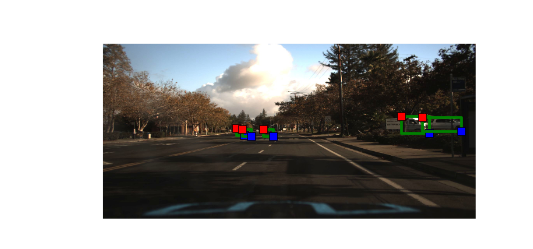

In [135]:
def augment_brightness_camera_images(image):
    
    ### Augment brightness 
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1


def trans_image(image,bb_boxes_f,trans_range):
    # Translation augmentation
    bb_boxes_f = bb_boxes_f.copy(deep=True)

    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2

    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    rows,cols,channels = image.shape
    bb_boxes_f['xmin'] = bb_boxes_f['xmin']+tr_x
    bb_boxes_f['xmax'] = bb_boxes_f['xmax']+tr_x
    bb_boxes_f['ymin'] = bb_boxes_f['ymin']+tr_y
    bb_boxes_f['ymax'] = bb_boxes_f['ymax']+tr_y
    
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,bb_boxes_f


def stretch_image(img,bb_boxes_f,scale_range):
    # Stretching augmentation 
    
    bb_boxes_f = bb_boxes_f.copy(deep=True)
    
    tr_x1 = scale_range*np.random.uniform()
    tr_y1 = scale_range*np.random.uniform()
    p1 = (tr_x1,tr_y1)
    tr_x2 = scale_range*np.random.uniform()
    tr_y2 = scale_range*np.random.uniform()
    p2 = (img.shape[1]-tr_x2,tr_y1)

    p3 = (img.shape[1]-tr_x2,img.shape[0]-tr_y2)
    p4 = (tr_x1,img.shape[0]-tr_y2)

    pts1 = np.float32([[p1[0],p1[1]],
                   [p2[0],p2[1]],
                   [p3[0],p3[1]],
                   [p4[0],p4[1]]])
    pts2 = np.float32([[0,0],
                   [img.shape[1],0],
                   [img.shape[1],img.shape[0]],
                   [0,img.shape[0]] ]
                   )

    M = cv2.getPerspectiveTransform(pts1,pts2)
    img = cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]))
    img = np.array(img,dtype=np.uint8)
    
    bb_boxes_f['xmin'] = (bb_boxes_f['xmin'] - p1[0])/(p2[0]-p1[0])*img.shape[1]
    bb_boxes_f['xmax'] = (bb_boxes_f['xmax'] - p1[0])/(p2[0]-p1[0])*img.shape[1]
    bb_boxes_f['ymin'] = (bb_boxes_f['ymin'] - p1[1])/(p3[1]-p1[1])*img.shape[0]
    bb_boxes_f['ymax'] = (bb_boxes_f['ymax'] - p1[1])/(p3[1]-p1[1])*img.shape[0]
    
    return img,bb_boxes_f


def get_image_name(df,ind,size=(640,300),augmentation = False,trans_range = 20,scale_range=20):
    ### Get image by name
    
    file_name = df['FilePath'][ind]
    img = cv2.imread(file_name)
    img_size = np.shape(img)
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,size)
    name_str = file_name.split('/')
    name_str = name_str[-1]
    #print(name_str)
    #print(file_name)
    bb_boxes = df[df['Frame'] == name_str].reset_index(drop=True)
    img_size_post = np.shape(img)
    
    if augmentation == True:
        img,bb_boxes = trans_image(img,bb_boxes,trans_range)
        img,bb_boxes = stretch_image(img,bb_boxes,scale_range)
        img = augment_brightness_camera_images(img)
        
    bb_boxes['xmin'] = np.round(bb_boxes['xmin']/img_size[1]*img_size_post[1])
    bb_boxes['xmax'] = np.round(bb_boxes['xmax']/img_size[1]*img_size_post[1])
    bb_boxes['ymin'] = np.round(bb_boxes['ymin']/img_size[0]*img_size_post[0])
    bb_boxes['ymax'] = np.round(bb_boxes['ymax']/img_size[0]*img_size_post[0])
    bb_boxes['Area'] = (bb_boxes['xmax']- bb_boxes['xmin'])*(bb_boxes['ymax']- bb_boxes['ymin']) 
    #bb_boxes = bb_boxes[bb_boxes['Area']>400]
        
    return name_str,img,bb_boxes

def get_mask_seg(img,bb_boxes_f):
    
    #### Get mask 
    
    img_mask = np.zeros_like(img[:,:,0])
    for i in range(len(bb_boxes_f)):
        #plot_bbox(bb_boxes,i,'g')
        bb_box_i = [bb_boxes_f.iloc[i]['xmin'],bb_boxes_f.iloc[i]['ymin'],
                bb_boxes_f.iloc[i]['xmax'],bb_boxes_f.iloc[i]['ymax']]
        img_mask[bb_box_i[1]:bb_box_i[3],bb_box_i[0]:bb_box_i[2]]= 1.
        img_mask = np.reshape(img_mask,(np.shape(img_mask)[0],np.shape(img_mask)[1],1))
    return img_mask


def plot_im_mask(im,im_mask):
    ### Function to plot image mask 
    
    im = np.array(im,dtype=np.uint8)
    im_mask = np.array(im_mask,dtype=np.uint8)
    plt.subplot(1,3,1)
    plt.imshow(im)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(im_mask[:,:,0])
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(cv2.bitwise_and(im,im,mask=im_mask));
    plt.axis('off')
    plt.show();


def plot_bbox(bb_boxes,ind_bb,color='r',linewidth=2):
    ### Plot bounding box
    
    bb_box_i = [bb_boxes.iloc[ind_bb]['xmin'],
                bb_boxes.iloc[ind_bb]['ymin'],
                bb_boxes.iloc[ind_bb]['xmax'],
                bb_boxes.iloc[ind_bb]['ymax']]
    plt.plot([bb_box_i[0],bb_box_i[2],bb_box_i[2],
                  bb_box_i[0],bb_box_i[0]],
             [bb_box_i[1],bb_box_i[1],bb_box_i[3],
                  bb_box_i[3],bb_box_i[1]],
             color,linewidth=linewidth)
    
def plot_im_bbox(im,bb_boxes):
    ### Plot image and bounding box
    plt.imshow(im)
    for i in range(len(bb_boxes)):
        plot_bbox(bb_boxes,i,'g')
    
        bb_box_i = [bb_boxes.iloc[i]['xmin'],bb_boxes.iloc[i]['ymin'],
                bb_boxes.iloc[i]['xmax'],bb_boxes.iloc[i]['ymax']]
        plt.plot(bb_box_i[0],bb_box_i[1],'rs')
        plt.plot(bb_box_i[2],bb_box_i[3],'bs')
    plt.axis('off');
    
    
name,img,bboxes = get_image_name(df_vehicles,4)

img_mask = get_mask_seg(img,bboxes)
#plot_im_mask(img,img_mask)
plot_im_bbox(img,bboxes)


